# Seasonal Decompose


## Omajinai

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12, 6)

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab+svg"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-04-26 22:55:40--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 18.65.148.47, 18.65.148.42, 18.65.148.50, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|18.65.148.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118808 (116K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 116.02K  --.-KB/s    in 0.04s   

2022-04-26 22:55:40 (2.69 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [118808/118808]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
df

(831, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,47065,3132,466,373,527,288,198,693,867,721,...,273,168,2494,514,454,678,383,511,830,1573
2022-04-22,42947,2845,454,401,614,238,240,597,1049,660,...,287,175,2464,465,512,624,394,434,786,1421
2022-04-23,43906,2785,403,364,715,283,213,649,952,768,...,283,158,2553,464,545,577,386,482,789,1662


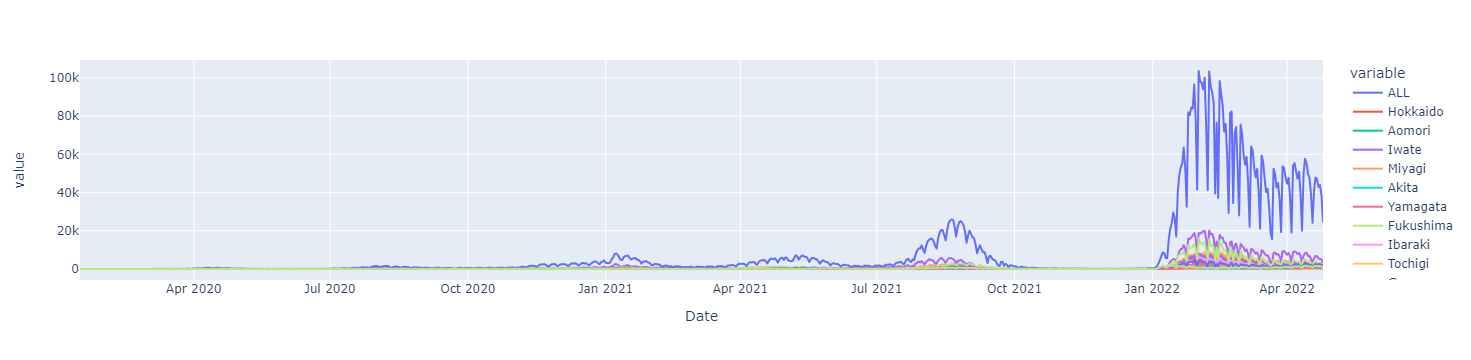

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).sum()
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(1))

(120, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-01,24778,1867,259,251,256,124,131,304,856,313,...,124,62,1543,357,284,266,215,244,374,489


### weekly

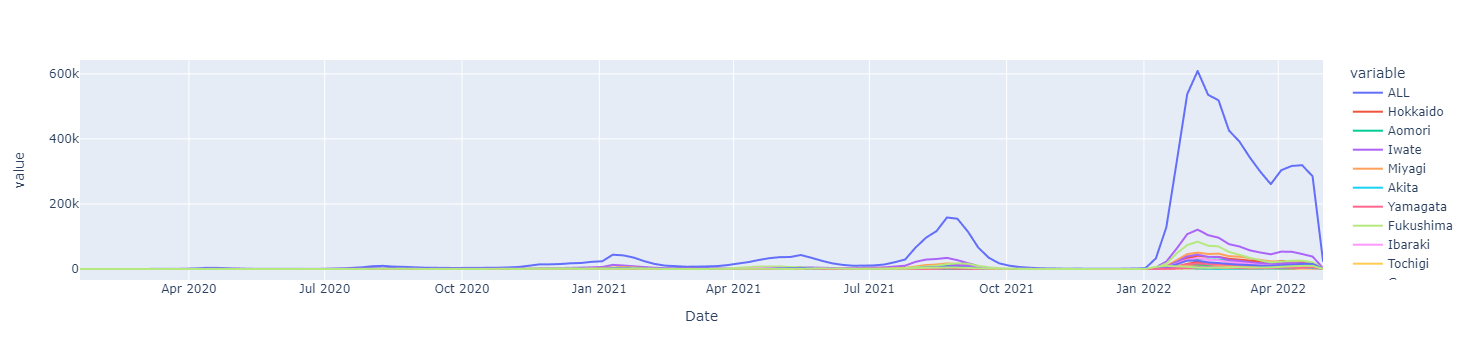

In [7]:
px.line(df_gr,)

## Decompose

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

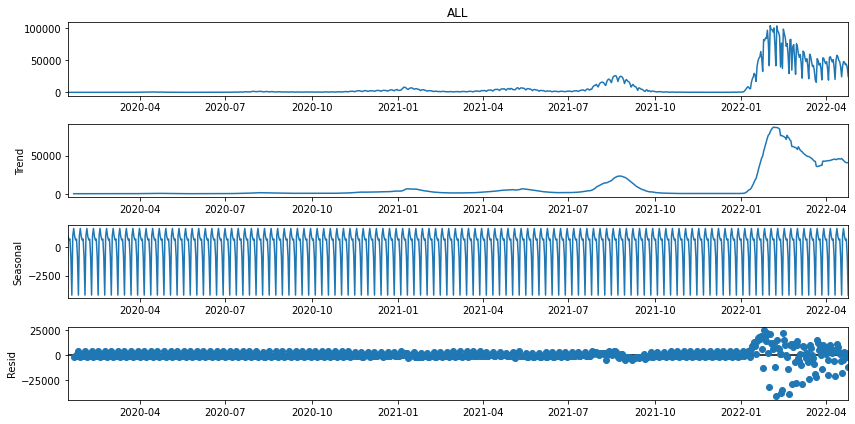

In [9]:
sd = seasonal_decompose(df.ALL, two_sided=False, )#period=7)
fig = sd.plot()

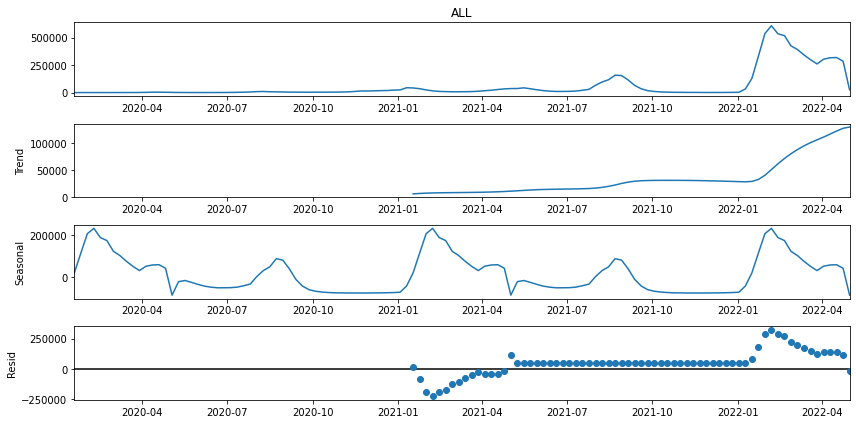

In [10]:
sd = seasonal_decompose(df_gr.ALL, two_sided=False, )#period=12)
fig = sd.plot()